# Импорты библиотек

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Добавьте необходимые библиотеки здесь

# Чтение данных

In [4]:
df_path = "videostreaming_platform.csv"

df = pd.read_csv(df_path)

print('=== Предварительный анализ данных: ===')
print('Первые 5 строк таблицы:')
df.head()

=== Предварительный анализ данных: ===
Первые 5 строк таблицы:


,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn
0,d1b6ef34-1991-452a-8c39-c83c0d5805fe,2024-02-01,St Petersburg,ios,performance,drama,2.076642,4,1
1,f1bf2396-73d8-461e-a775-9f068bd99326,2024-02-01,Other,web,seo,criminal,5.101392,1,1
2,ec9fa0be-4bd8-4fe6-910a-e9e6d4bbba28,2024-02-01,Ufa,web,performance,criminal,2.906597,1,1
3,b0195e96-af2e-4ac3-8f60-26b8d862af84,2024-02-01,Moscow,smarttv,seo,thriller,2.702388,6,0
4,a208985a-7244-4291-8d38-64c8141e27b2,2024-02-01,Ufa,web,performance,thriller,10.237305,1,1


In [5]:
print("Обща информация о датасете:")
df.info()

Обща информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                28000 non-null  object 
 1   start_trial_date       28000 non-null  object 
 2   city                   27692 non-null  object 
 3   device                 28000 non-null  object 
 4   source                 28000 non-null  object 
 5   favourite_genre        20048 non-null  object 
 6   avg_min_watch_daily    28000 non-null  float64
 7   number_of_days_logged  28000 non-null  int64  
 8   churn                  28000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [6]:
print("Размер датасета:")
df.shape

Размер датасета:


(28000, 9)

In [7]:
print("Количество пользователей:")
df['user_id'].nunique()

Количество пользователей:


28000

In [8]:
print('Статистика по числовым переменным:')
df.describe()

Статистика по числовым переменным:


,avg_min_watch_daily,number_of_days_logged,churn
count,28000.000000,28000.00000,28000.000000
mean,7.812663,1.88600,0.789286
std,7.739760,1.48293,0.407823
min,0.000181,1.00000,0.000000
25%,2.521966,1.00000,1.000000
50%,5.419012,1.00000,1.000000
75%,10.487946,2.00000,1.000000
max,80.072401,7.00000,1.000000


In [9]:
print("Пропущенные значения:")
df.isnull().sum()

Пропущенные значения:


user_id                     0
start_trial_date            0
city                      308
device                      0
source                      0
favourite_genre          7952
avg_min_watch_daily         0
number_of_days_logged       0
churn                       0
dtype: int64

# Чистка данных

In [10]:
# Ваш код здесь
# Создание копии для работы
df_clean = df.copy()

# Обработка пропусков
df_clean['city'] = df_clean['city'].fillna('Unknown')
df_clean['favourite_genre'] = df_clean[
    'favourite_genre'
].fillna('not_selected')

# Создание новых признаков
# Преобразование даты
df_clean['start_trial_date'] = pd.to_datetime(df_clean['start_trial_date'])

# Преобразование ушедших (churn), ушел = True, не ушел - False
df_clean['churn'] = df_clean['churn'].astype(bool)


# Создание бинарных признаков

# В логике, что некоторым все равно, что смотреть.
df_clean['is_genre_selected'] = (
    df_clean['favourite_genre'] != 'not_selected'
).astype(bool)

# Крупные города vs остальная Россия (тут возможна корреляция с девайсами)
df_clean['is_top_city'] = df_clean['city'].isin(
    ['Moscow', 'St Petersburg']
).astype(bool)

# Категория тех, кто побогаче
df_clean['is_smarttv_or_ios'] = df_clean['device'].isin(
    ['smarttv', 'ios']
).astype(bool)

# Категория тех, кто в движении (студенты?)
df_clean['is_mobile'] = df_clean['device'].isin(
    ['android', 'ios']
).astype(bool)

# Каегория тех, кто живет промо акциями
df_clean['is_performance_source'] = (
    df_clean['source'] == 'performance'
).astype(bool)

# Создание категорий по времени просмотра
df_clean['watch_time_category'] = pd.cut(
    df_clean['avg_min_watch_daily'],
    bins=[0, 2, 10, 30, 100],
    labels=['very_low', 'low', 'medium', 'high'],
    include_lowest=True
)

# Расчет общего времени просмотра
df_clean['total_watch_time'] = (
    df_clean['avg_min_watch_daily'] * df_clean['number_of_days_logged']
)
df_clean.head()

,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn,is_genre_selected,is_top_city,is_smarttv_or_ios,is_mobile,is_performance_source,watch_time_category,total_watch_time
0,d1b6ef34-1991-452a-8c39-c83c0d5805fe,2024-02-01,St Petersburg,ios,performance,drama,2.076642,4,True,True,True,True,True,True,low,8.306568
1,f1bf2396-73d8-461e-a775-9f068bd99326,2024-02-01,Other,web,seo,criminal,5.101392,1,True,True,False,False,False,False,low,5.101392
2,ec9fa0be-4bd8-4fe6-910a-e9e6d4bbba28,2024-02-01,Ufa,web,performance,criminal,2.906597,1,True,True,False,False,False,True,low,2.906597
3,b0195e96-af2e-4ac3-8f60-26b8d862af84,2024-02-01,Moscow,smarttv,seo,thriller,2.702388,6,False,True,True,True,False,False,low,16.214331
4,a208985a-7244-4291-8d38-64c8141e27b2,2024-02-01,Ufa,web,performance,thriller,10.237305,1,True,True,False,False,False,True,medium,10.237305


In [14]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0–10 мин', '10–20 мин','20–30 мин','30–40 мин', '40–50 мин','50–60 мин','60–70 мин','70–80 мин','80–90 мин']

df['watch_cohort'] = pd.cut(
    df['avg_min_watch_daily'],
    bins=bins,
    labels=labels,
    right=False  # интервал [0,10)
)

C:\Users\Тихон\AppData\Local\Temp\ipykernel_15848\478305736.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col, dropna=False)['churn']



=== city ===
            city  churn_rate
8  Yekaterinburg    0.806418
6            Ufa    0.802058
3          Other    0.800752
0      Krasnodar    0.789515
9            NaN    0.788961
7       Voronezh    0.786990
1         Moscow    0.786859
2    Novosibirsk    0.785359
4         Samara    0.784115
5  St Petersburg    0.779911


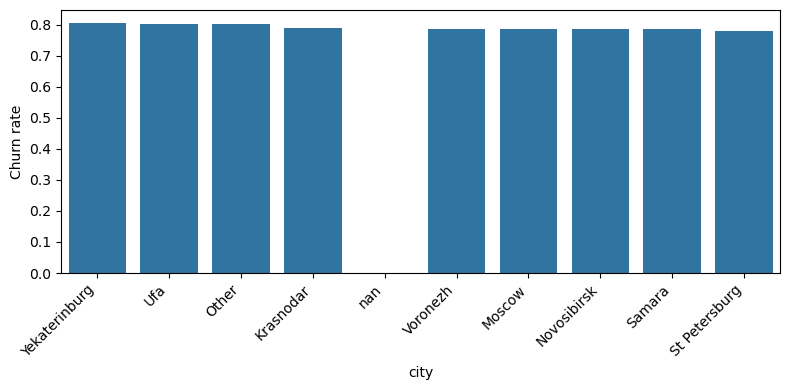


=== device ===
    device  churn_rate
2  smarttv    0.796119
1      ios    0.792430
3      web    0.787911
0  android    0.786300


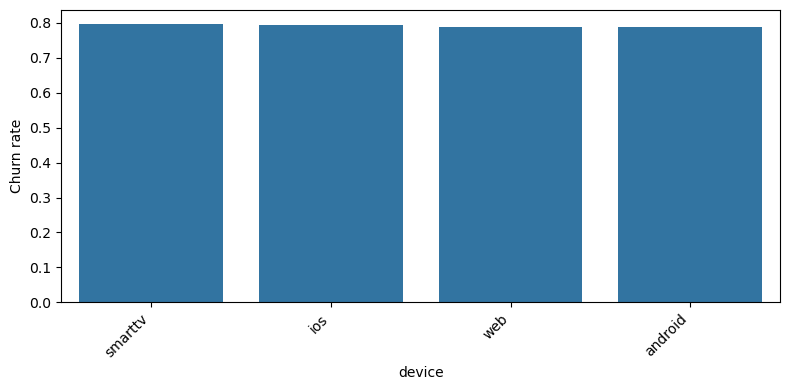


=== source ===
        source  churn_rate
0      organic    0.795588
2          seo    0.788432
1  performance    0.786039


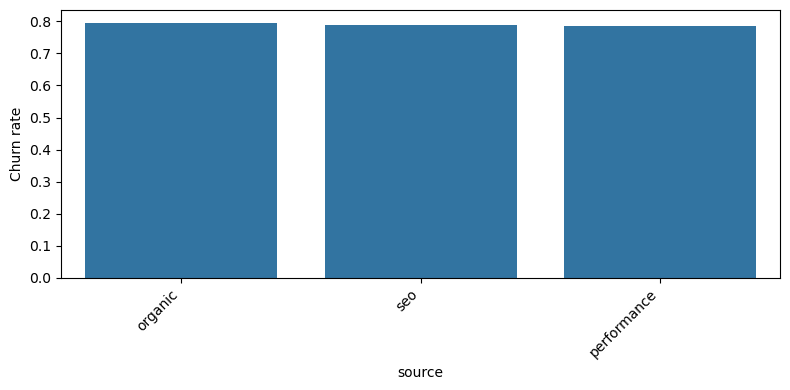


=== favourite_genre ===
  favourite_genre  churn_rate
0          action    0.796235
2        criminal    0.791612
5             NaN    0.789990
1          comedy    0.788749
3           drama    0.786729
4        thriller    0.783797


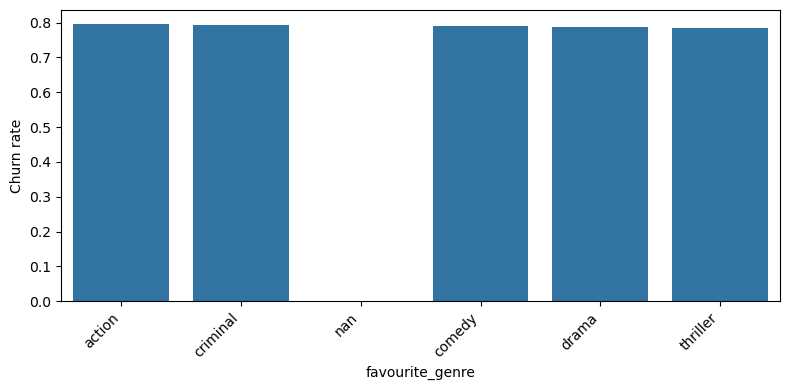


=== number_of_days_logged ===
   number_of_days_logged  churn_rate
4                      5    0.795635
0                      1    0.792800
2                      3    0.788177
6                      7    0.787815
1                      2    0.785931
3                      4    0.775097
5                      6    0.757519


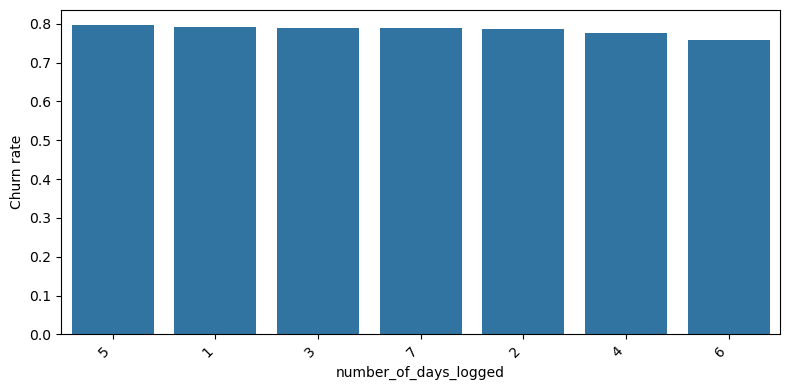

C:\Users\Тихон\AppData\Local\Temp\ipykernel_15848\478305736.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col, dropna=False)['churn']



=== watch_cohort ===
  watch_cohort  churn_rate
0     0–10 мин    0.891101
1    10–20 мин    0.583825
2    20–30 мин    0.376640
3    30–40 мин    0.231850
5    50–60 мин    0.217391
4    40–50 мин    0.136691
6    60–70 мин    0.083333
8    80–90 мин    0.000000
7    70–80 мин         NaN


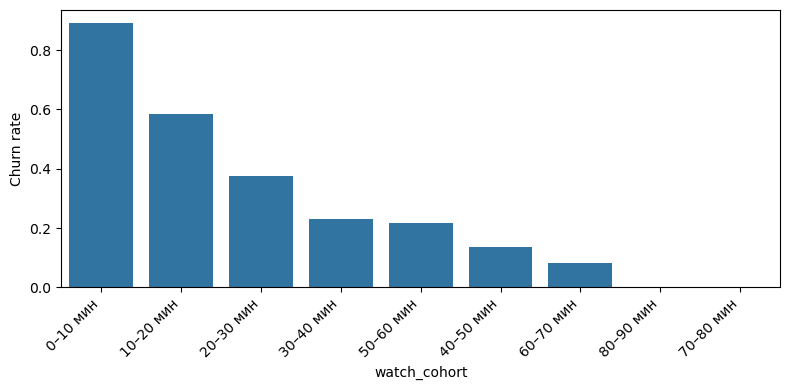

In [16]:
def churn_by(col):
    # ***
    # Функция для расчёта churn_rate по группе
    # ***
    return (
        df.groupby(col, dropna=False)['churn']
          .mean()
          .reset_index(name='churn_rate')
          .sort_values('churn_rate', ascending=False)
    )

city_cr              = churn_by('city')
device_cr            = churn_by('device')
source_cr            = churn_by('source')
favourite_genre_cr   = churn_by('favourite_genre')
number_days_logged_cr = churn_by('number_of_days_logged')
watch_cohort_cr      = churn_by('watch_cohort') 

cols = ['city', 'device', 'source',
        'favourite_genre', 'number_of_days_logged', 'watch_cohort']

for col in cols:
    cr = churn_by(col)

    print(f'\n=== {col} ===')
    print(cr)

    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=cr,
        x=col,
        y='churn_rate',
        order=cr[col]
    )
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Churn rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



=== city ===
            city     n
0         Moscow  8736
1  St Petersburg  4480
2          Other  2660
3      Krasnodar  2575
4    Novosibirsk  2213
5  Yekaterinburg  1932
6         Samara  1876
7            Ufa  1652
8       Voronezh  1568
9            NaN   308


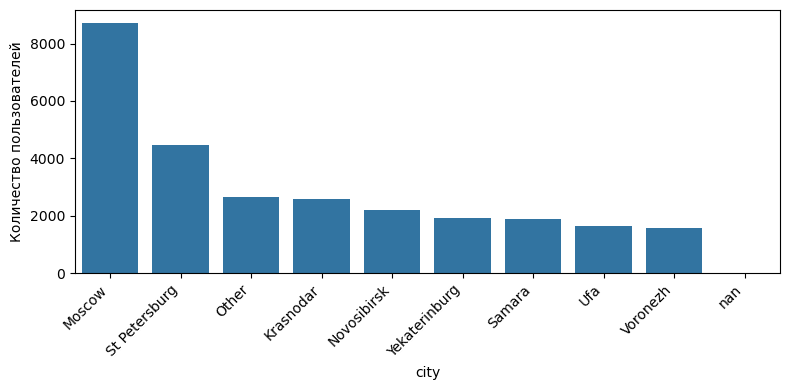


=== device ===
    device      n
0      web  17752
1  smarttv   3556
2  android   3416
3      ios   3276


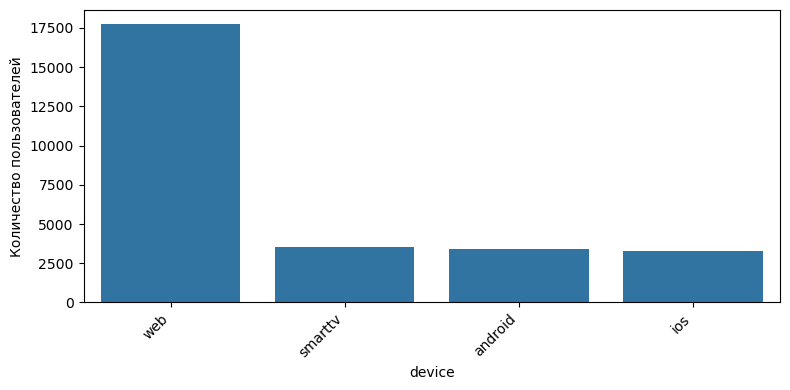


=== source ===
        source      n
0  performance  14540
1      organic   8204
2          seo   5256


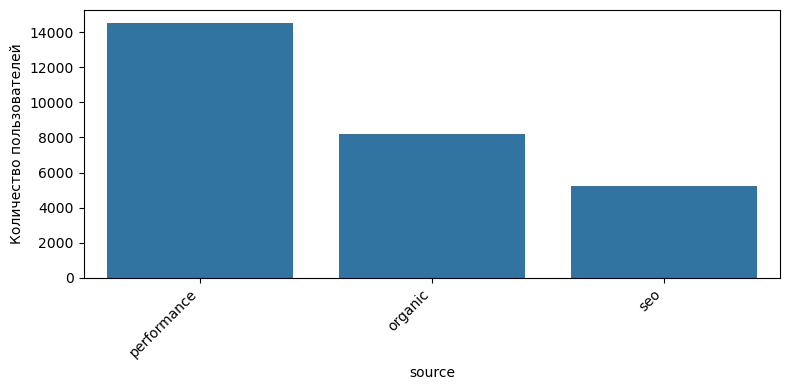


=== favourite_genre ===
  favourite_genre     n
0             NaN  7952
1           drama  4928
2          comedy  4284
3        thriller  4172
4          action  3612
5        criminal  3052


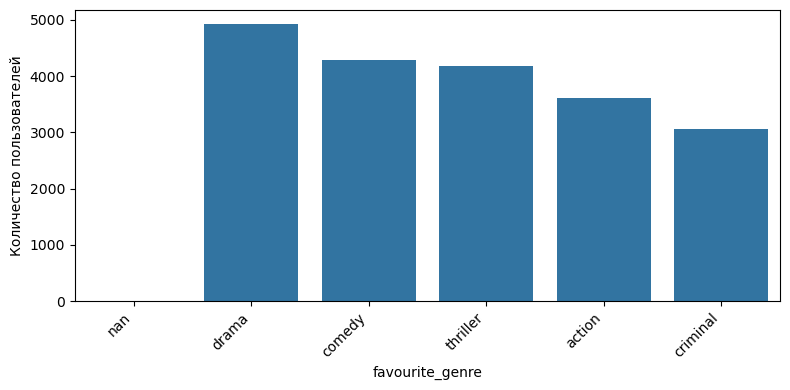


=== number_of_days_logged ===
   number_of_days_logged      n
0                      1  17360
1                      2   4620
2                      3   2436
3                      6   1064
4                      4   1036
5                      5   1008
6                      7    476


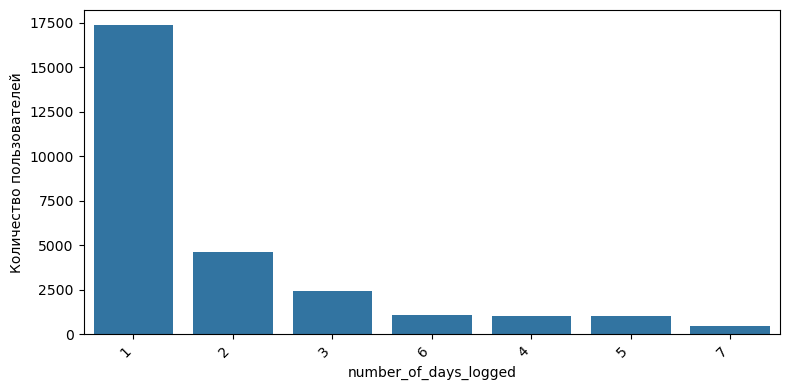


=== watch_cohort ===
  watch_cohort      n
0     0–10 мин  20542
1    10–20 мин   5255
2    20–30 мин   1601
3    30–40 мин    427
4    40–50 мин    139
5    50–60 мин     23
6    60–70 мин     12
7    80–90 мин      1
8    70–80 мин      0


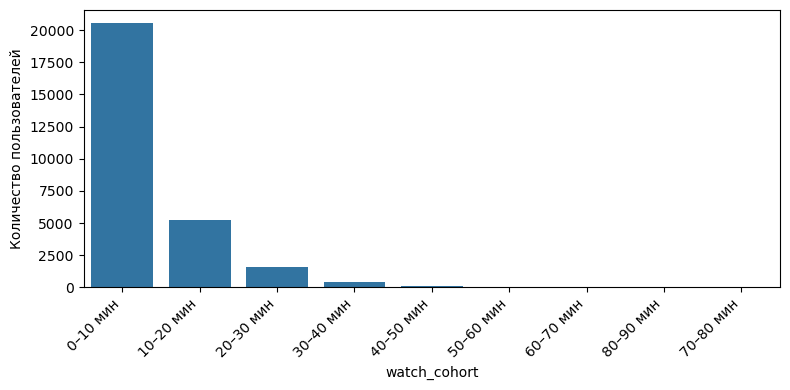

In [17]:
def counts_by(col):

    #расчет количества
    return (
        df[col]
        .value_counts(dropna=False)          # количество строк в каждой категории
        .reset_index(name='n')               # n — число наблюдений
        .rename(columns={'index': col})
    )

city_cnt            = counts_by('city')
device_cnt          = counts_by('device')
source_cnt          = counts_by('source')
favourite_genre_cnt = counts_by('favourite_genre')
days_logged_cnt     = counts_by('number_of_days_logged')
watch_cohort_cnt    = counts_by('watch_cohort')   # если уже есть когорты

cols = ['city', 'device', 'source',
        'favourite_genre', 'number_of_days_logged', 'watch_cohort']

# 3. Цикл по признакам: считаем и рисуем
for col in cols:
    cnt = counts_by(col)

    print(f'\n=== {col} ===')
    print(cnt)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=cnt, x=col, y='n', order=cnt[col])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Количество пользователей')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Гипотезы

In [23]:
# Укажите список + стратегию проверки